In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv(r"C:\Semester 3\Capstone\Project\cyclist_data_23T2.csv")

# Clean column names
df.columns = df.columns.str.strip().str.replace(' ', '_').str.lower()
df.head()


,date_aest,time_first,time_last,distance,calories,speed_max,speed_min,speed_avg,heartrate_max,heartrate_min,...,time_taken,dist_point_in_20,calories_point_in_20,hertrate_point_in20,speed_point_iin_20,power_points_in_20,candence_point_in_20,total_points,duration,workout_duration
0,12-Mar-21,##############################################...,##############################################...,10.31,222.0,33.24,0.0,18.74,183.99,104.18,...,0.355995,5.641587,4.712790,20.0,13.206483,11.103448,11.103448,65.767757,09:13:41,9
1,15-Mar-21,##############################################...,##############################################...,5.18,99.0,35.58,0.0,20.79,183.99,104.18,...,0.456019,2.834473,2.101650,20.0,14.651163,10.982509,10.982509,61.552303,10:13:41,10
2,18-Mar-21,##############################################...,##############################################...,20.12,479.0,53.56,0.0,23.97,183.99,104.18,...,0.234861,11.009576,10.168588,20.0,16.892178,15.812094,15.812094,89.694530,11:13:41,11
3,20-Mar-21,##############################################...,##############################################...,5.77,109.0,36.22,0.0,18.46,183.99,104.18,...,0.021157,3.157319,2.313938,20.0,13.009161,9.896052,9.896052,58.272522,12:13:41,12
4,30-Mar-21,##############################################...,##############################################...,5.95,134.0,44.60,0.0,23.84,183.99,104.18,...,0.260984,3.255814,2.844657,20.0,16.800564,14.320840,14.320840,71.542714,13:13:41,13


In [4]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Drop duplicate rows if any
df.drop_duplicates(inplace=True)

# Convert datetime fields if available
if 'Start' in df.columns and 'End' in df.columns:
    df['Start'] = pd.to_datetime(df['Start'])
    df['End'] = pd.to_datetime(df['End'])
    df['Duration_Minutes'] = (df['End'] - df['Start']).dt.total_seconds() / 60



Missing Values:
 date_aest               0
time_first              0
time_last               0
distance                0
calories                0
speed_max               0
speed_min               0
speed_avg               0
heartrate_max           0
heartrate_min           0
heartrate_avg           0
cadence_max             0
cadence_min             0
cadence_avg             0
power_max               0
power_min               0
power_avg               0
ftp                     0
time_taken              0
dist_point_in_20        0
calories_point_in_20    0
hertrate_point_in20     0
speed_point_iin_20      0
power_points_in_20      0
candence_point_in_20    0
total_points            0
duration                0
workout_duration        0
dtype: int64


In [6]:
# Summary statistics
df.describe()


,distance,calories,speed_max,speed_min,speed_avg,heartrate_max,heartrate_min,heartrate_avg,cadence_max,cadence_min,...,ftp,time_taken,dist_point_in_20,calories_point_in_20,hertrate_point_in20,speed_point_iin_20,power_points_in_20,candence_point_in_20,total_points,workout_duration
count,309.000000,309.000000,309.000000,309.000000,309.00000,309.000000,309.000000,309.000000,309.000000,309.000000,...,309.0,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,36.554045,942.176958,54.134078,0.537929,28.38246,183.988026,104.183172,157.406246,107.983819,0.126214,...,301.0,0.145167,15.508161,16.247468,19.384618,18.735378,19.019322,19.019322,107.914269,11.543689
std,23.704202,532.989404,19.322809,1.477176,4.77409,11.475123,16.165128,15.889165,9.259765,1.579164,...,0.0,0.146493,5.599556,4.865651,1.658114,2.456475,1.994488,1.994488,13.513003,6.952216
min,0.610000,18.000000,22.830000,0.000000,11.78000,130.000000,36.000000,91.710000,71.000000,0.000000,...,301.0,0.001192,0.333789,0.382118,11.652373,8.301621,9.896052,9.896052,58.272522,0.000000
25%,22.470000,649.000000,45.330000,0.000000,26.49000,183.990000,101.000000,157.410000,104.000000,0.000000,...,301.0,0.044757,12.295486,13.777482,20.000000,18.668076,19.054473,19.054473,101.208420,5.000000
50%,33.380000,874.000000,51.590000,0.000000,29.49000,185.000000,104.180000,158.840000,108.000000,0.000000,...,301.0,0.067604,18.265390,18.553959,20.000000,20.000000,20.000000,20.000000,112.574130,12.000000
75%,42.900000,1032.000000,60.740000,0.000000,31.58000,190.000000,113.000000,166.510000,112.000000,0.000000,...,301.0,0.229028,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,118.632840,18.000000
max,166.990000,3735.000000,225.790000,10.600000,40.04000,204.000000,146.000000,183.540000,153.000000,22.000000,...,301.0,0.605706,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,120.000000,23.000000


In [8]:
print(df.columns.tolist())


['date_aest', 'time_first', 'time_last', 'distance', 'calories', 'speed_max', 'speed_min', 'speed_avg', 'heartrate_max', 'heartrate_min', 'heartrate_avg', 'cadence_max', 'cadence_min', 'cadence_avg', 'power_max', 'power_min', 'power_avg', 'ftp', 'time_taken', 'dist_point_in_20', 'calories_point_in_20', 'hertrate_point_in20', 'speed_point_iin_20', 'power_points_in_20', 'candence_point_in_20', 'total_points', 'duration', 'workout_duration']


In [10]:
# Calories burned per minute of workout
df['calories_per_minute'] = df['calories'] / df['workout_duration']

# Calories per kilometre
df['calories_per_km'] = df['calories'] / df['distance']

# Speed efficiency (speed per calorie)
df['speed_efficiency'] = df['speed_avg'] / df['calories']

# Heart rate reserve (max - min)
df['hr_reserve'] = df['heartrate_max'] - df['heartrate_min']

# Heart intensity: avg HR as % of max HR
df['hr_intensity_ratio'] = df['heartrate_avg'] / df['heartrate_max']

# Power per cadence (watts per RPM)
df['power_cadence_ratio'] = df['power_avg'] / df['cadence_avg']

# Show top rows with new KPIs
df[['calories_per_minute', 'calories_per_km', 'speed_efficiency', 'hr_reserve', 'hr_intensity_ratio', 'power_cadence_ratio']].head()


,calories_per_minute,calories_per_km,speed_efficiency,hr_reserve,hr_intensity_ratio,power_cadence_ratio
0,24.666667,21.532493,0.084414,79.81,0.855536,3.320084
1,9.900000,19.111969,0.210000,79.81,0.855536,3.093468
2,43.545455,23.807157,0.050042,79.81,0.855536,3.363810
3,9.083333,18.890815,0.169358,79.81,0.855536,3.161239
4,10.307692,22.521008,0.177910,79.81,0.855536,3.294550


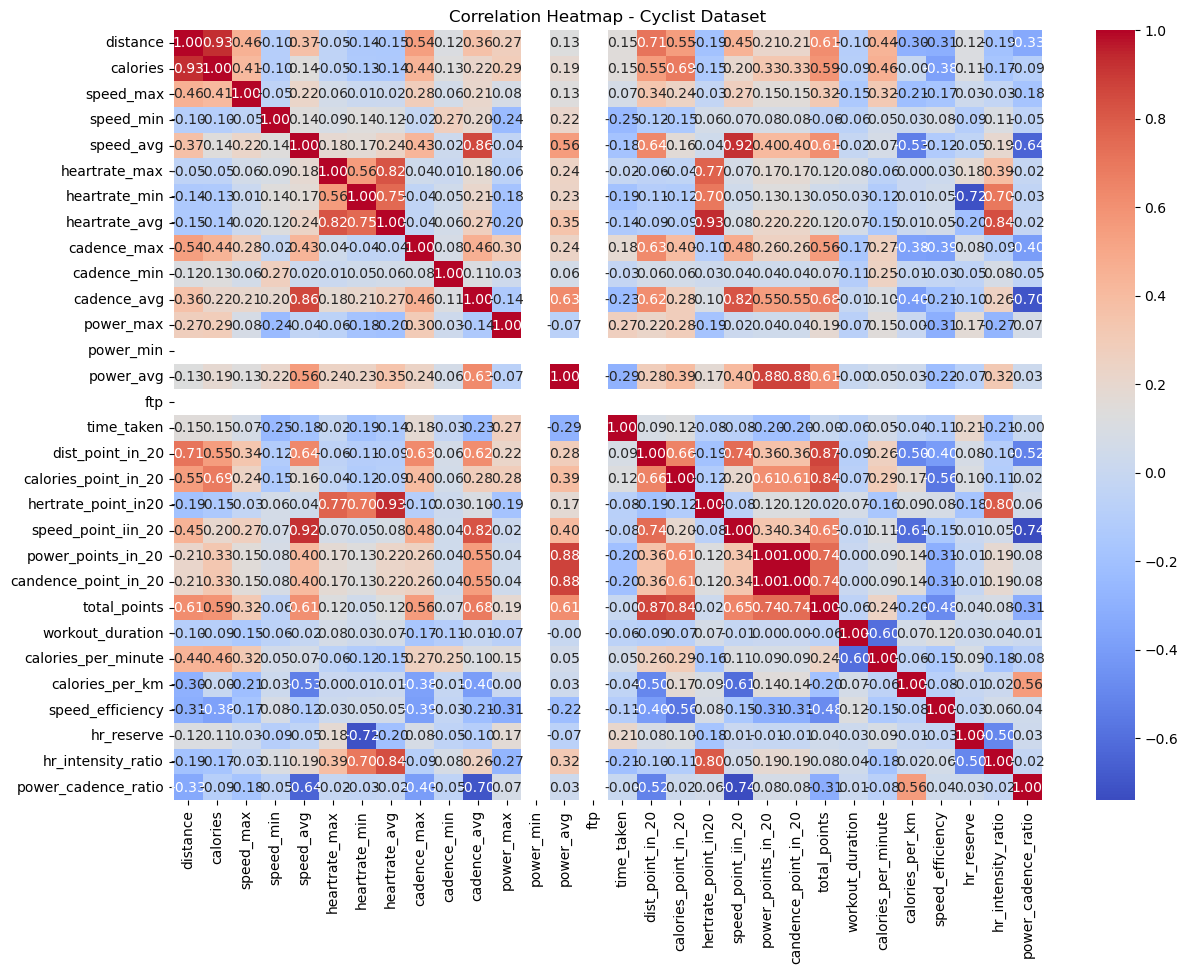

In [12]:
# Correlation matrix to explore hidden relationships
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
plt.title("Correlation Heatmap - Cyclist Dataset")
plt.show()


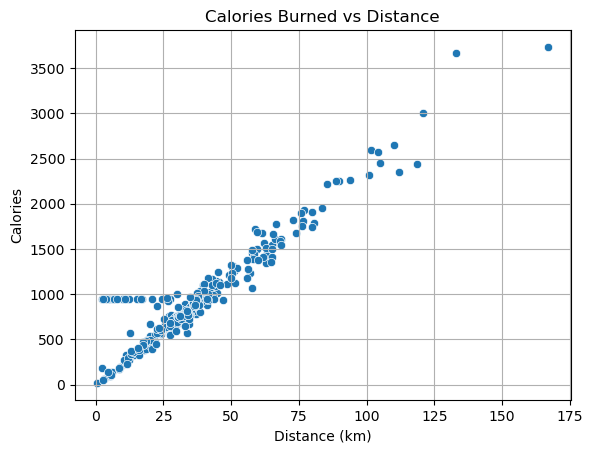

In [14]:
# Calories vs Distance
sns.scatterplot(data=df, x='distance', y='calories')
plt.title("Calories Burned vs Distance")
plt.xlabel("Distance (km)")
plt.ylabel("Calories")
plt.grid(True)
plt.show()

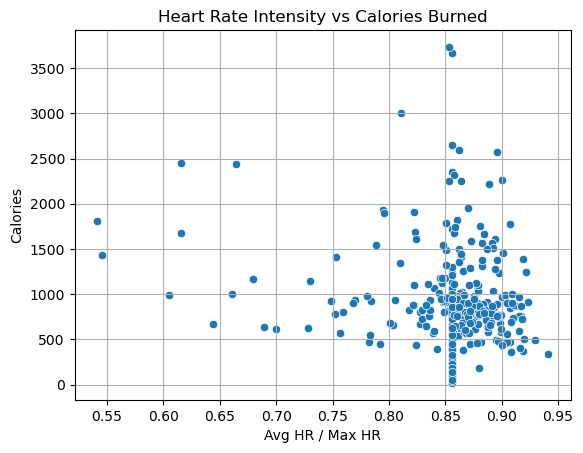

In [16]:
# HR intensity vs Calories
sns.scatterplot(data=df, x='hr_intensity_ratio', y='calories')
plt.title("Heart Rate Intensity vs Calories Burned")
plt.xlabel("Avg HR / Max HR")
plt.ylabel("Calories")
plt.grid(True)
plt.show()


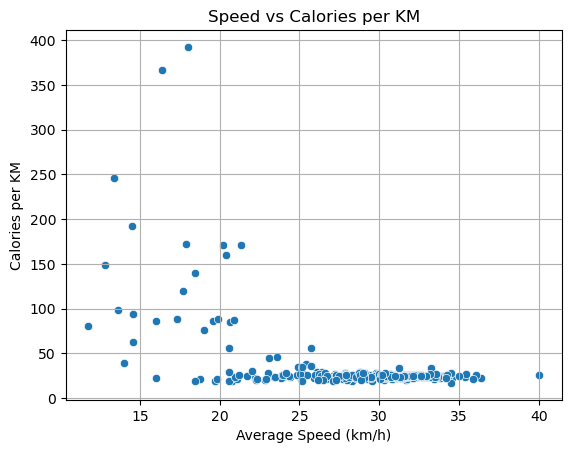

In [18]:
# Speed vs Calories per KM
sns.scatterplot(data=df, x='speed_avg', y='calories_per_km')
plt.title("Speed vs Calories per KM")
plt.xlabel("Average Speed (km/h)")
plt.ylabel("Calories per KM")
plt.grid(True)
plt.show()

In [20]:
df.dtypes


date_aest                object
time_first               object
time_last                object
distance                float64
calories                float64
speed_max               float64
speed_min               float64
speed_avg               float64
heartrate_max           float64
heartrate_min           float64
heartrate_avg           float64
cadence_max               int64
cadence_min               int64
cadence_avg             float64
power_max               float64
power_min                 int64
power_avg               float64
ftp                       int64
time_taken              float64
dist_point_in_20        float64
calories_point_in_20    float64
hertrate_point_in20     float64
speed_point_iin_20      float64
power_points_in_20      float64
candence_point_in_20    float64
total_points            float64
duration                 object
workout_duration          int64
calories_per_minute     float64
calories_per_km         float64
speed_efficiency        float64
hr_reser

In [22]:
# Convert columns to numeric 
cols_to_convert = [
    'distance', 'calories', 'duration',
    'cadence_max', 'cadence_min',
    'heartrate_max', 'heartrate_min', 'heartrate_avg',
    'speed_max', 'speed_min', 'speed_avg',
    'power_max', 'power_min', 'power_avg',
    'ftp'
]

for col in cols_to_convert:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


In [24]:
# KPI Calculations
df['calories_per_km'] = df['calories'] / df['distance']
df['calories_per_min'] = df['calories'] / df['duration']
df['cadence_range'] = df['cadence_max'] - df['cadence_min']
df['hr_range'] = df['heartrate_max'] - df['heartrate_min']
df['speed_range'] = df['speed_max'] - df['speed_min']
df['power_range'] = df['power_max'] - df['power_min']
df['workout_efficiency'] = df['calories'] / df['power_avg']
df['hr_reserve_ratio'] = df['heartrate_avg'] / df['ftp']

# View updated KPIs
df[['calories_per_km', 'workout_efficiency']].head()


,calories_per_km,workout_efficiency
0,21.532493,1.998380
1,19.111969,0.900983
2,23.807157,3.027813
3,18.890815,1.100899
4,22.521008,0.935232


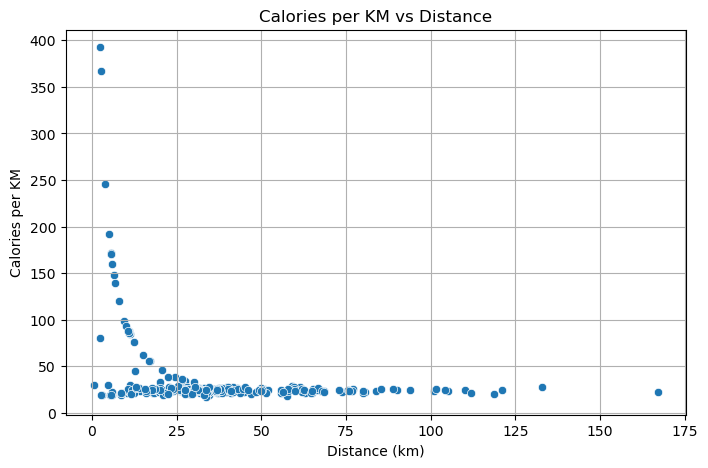

In [26]:
# Calories per KM vs Distance
plt.figure(figsize=(8, 5))
sns.scatterplot(x='distance', y='calories_per_km', data=df)
plt.title('Calories per KM vs Distance')
plt.xlabel('Distance (km)')
plt.ylabel('Calories per KM')
plt.grid(True)
plt.show()

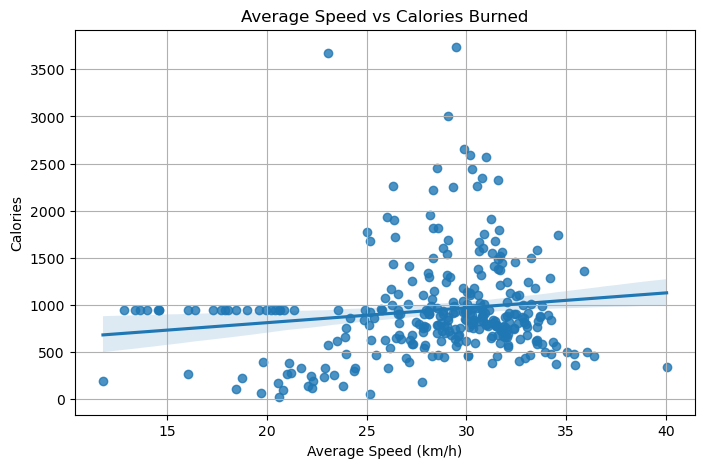

In [28]:
# Average Speed vs Calories
plt.figure(figsize=(8, 5))
sns.regplot(x='speed_avg', y='calories', data=df)
plt.title('Average Speed vs Calories Burned')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

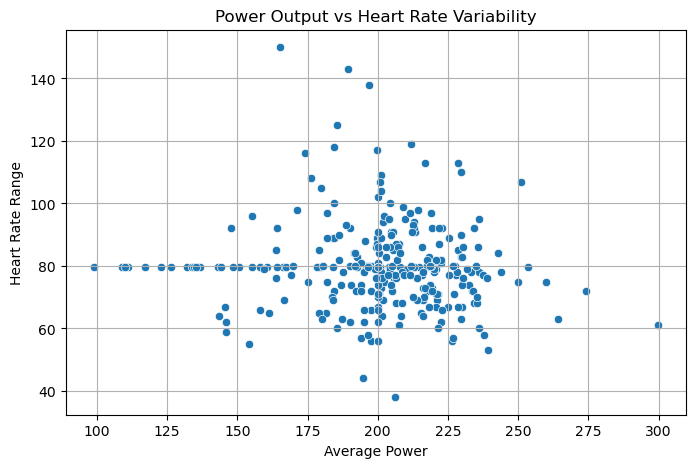

In [30]:
# Power vs HR Range
plt.figure(figsize=(8, 5))
sns.scatterplot(x='power_avg', y='hr_range', data=df)
plt.title('Power Output vs Heart Rate Variability')
plt.xlabel('Average Power')
plt.ylabel('Heart Rate Range')
plt.grid(True)
plt.show()

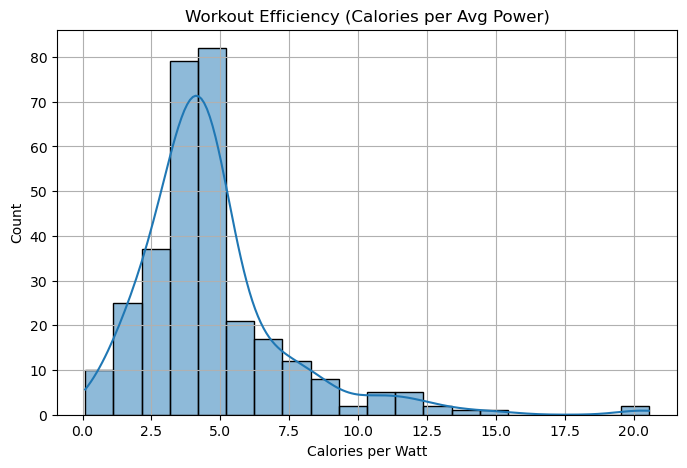

In [32]:
# Workout Efficiency Distribution
plt.figure(figsize=(8, 5))
sns.histplot(df['workout_efficiency'], bins=20, kde=True)
plt.title('Workout Efficiency (Calories per Avg Power)')
plt.xlabel('Calories per Watt')
plt.grid(True)
plt.show()

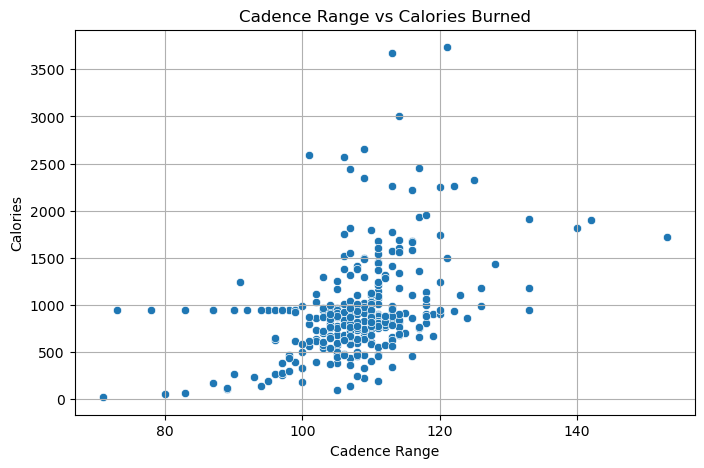

In [34]:
# Cadence Range vs Calories
plt.figure(figsize=(8, 5))
sns.scatterplot(x='cadence_range', y='calories', data=df)
plt.title('Cadence Range vs Calories Burned')
plt.xlabel('Cadence Range')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

In [38]:
# Check the real column names (including hidden spaces)
print(df.columns.tolist())


['date_aest', 'time_first', 'time_last', 'distance', 'calories', 'speed_max', 'speed_min', 'speed_avg', 'heartrate_max', 'heartrate_min', 'heartrate_avg', 'cadence_max', 'cadence_min', 'cadence_avg', 'power_max', 'power_min', 'power_avg', 'ftp', 'time_taken', 'dist_point_in_20', 'calories_point_in_20', 'hertrate_point_in20', 'speed_point_iin_20', 'power_points_in_20', 'candence_point_in_20', 'total_points', 'duration', 'workout_duration', 'calories_per_minute', 'calories_per_km', 'speed_efficiency', 'hr_reserve', 'hr_intensity_ratio', 'power_cadence_ratio', 'calories_per_min', 'cadence_range', 'hr_range', 'speed_range', 'power_range', 'workout_efficiency', 'hr_reserve_ratio']


C:\Users\sriha\AppData\Local\Temp\ipykernel_2684\2146426463.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['date_aest'] = pd.to_datetime(df['date_aest'])


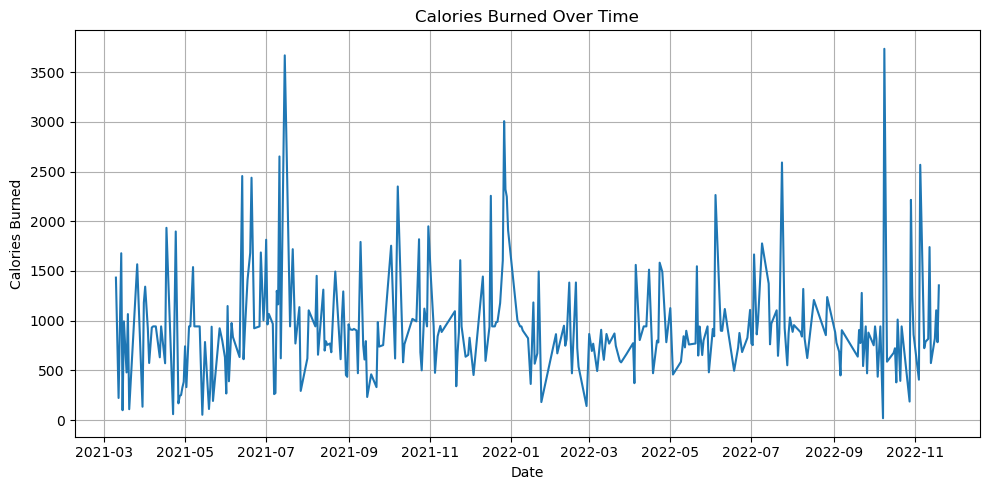

In [40]:
# Convert date column to datetime
df['date_aest'] = pd.to_datetime(df['date_aest'])

# Line plot of total calories per day
df.groupby(df['date_aest'].dt.date)['calories'].sum().plot(
    kind='line',
    figsize=(10, 5),
    title='Calories Burned Over Time',
    xlabel='Date',
    ylabel='Calories Burned',
    grid=True
)
plt.tight_layout()
plt.show()


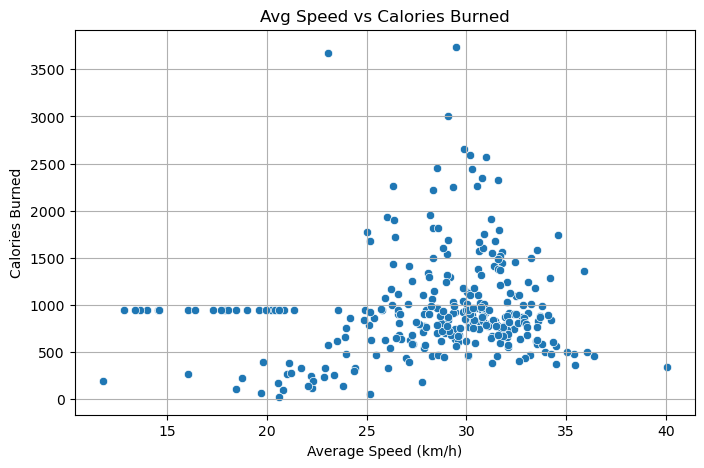

In [42]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='speed_avg', y='calories')
plt.title('Avg Speed vs Calories Burned')
plt.xlabel('Average Speed (km/h)')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()


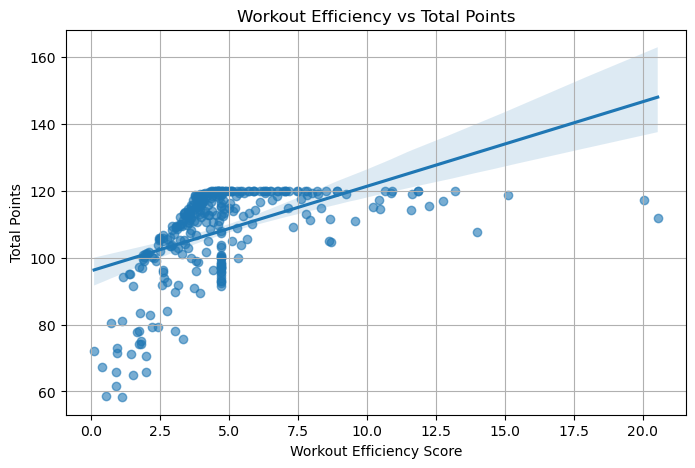

In [44]:
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='workout_efficiency', y='total_points', scatter_kws={"alpha":0.6})
plt.title('Workout Efficiency vs Total Points')
plt.xlabel('Workout Efficiency Score')
plt.ylabel('Total Points')
plt.grid(True)
plt.show()


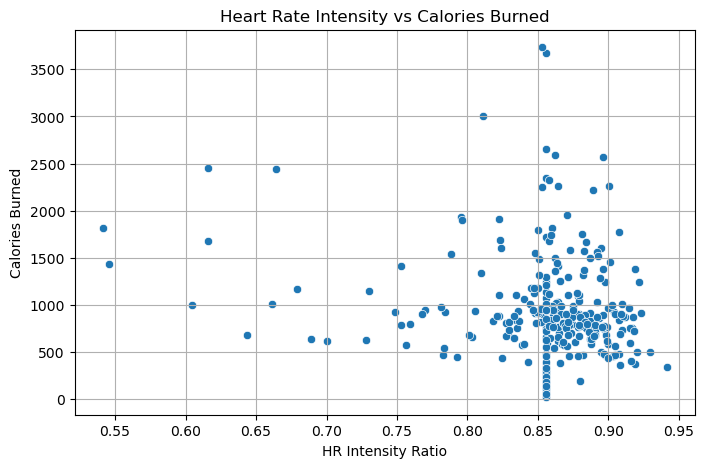

In [46]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='hr_intensity_ratio', y='calories')
plt.title('Heart Rate Intensity vs Calories Burned')
plt.xlabel('HR Intensity Ratio')
plt.ylabel('Calories Burned')
plt.grid(True)
plt.show()


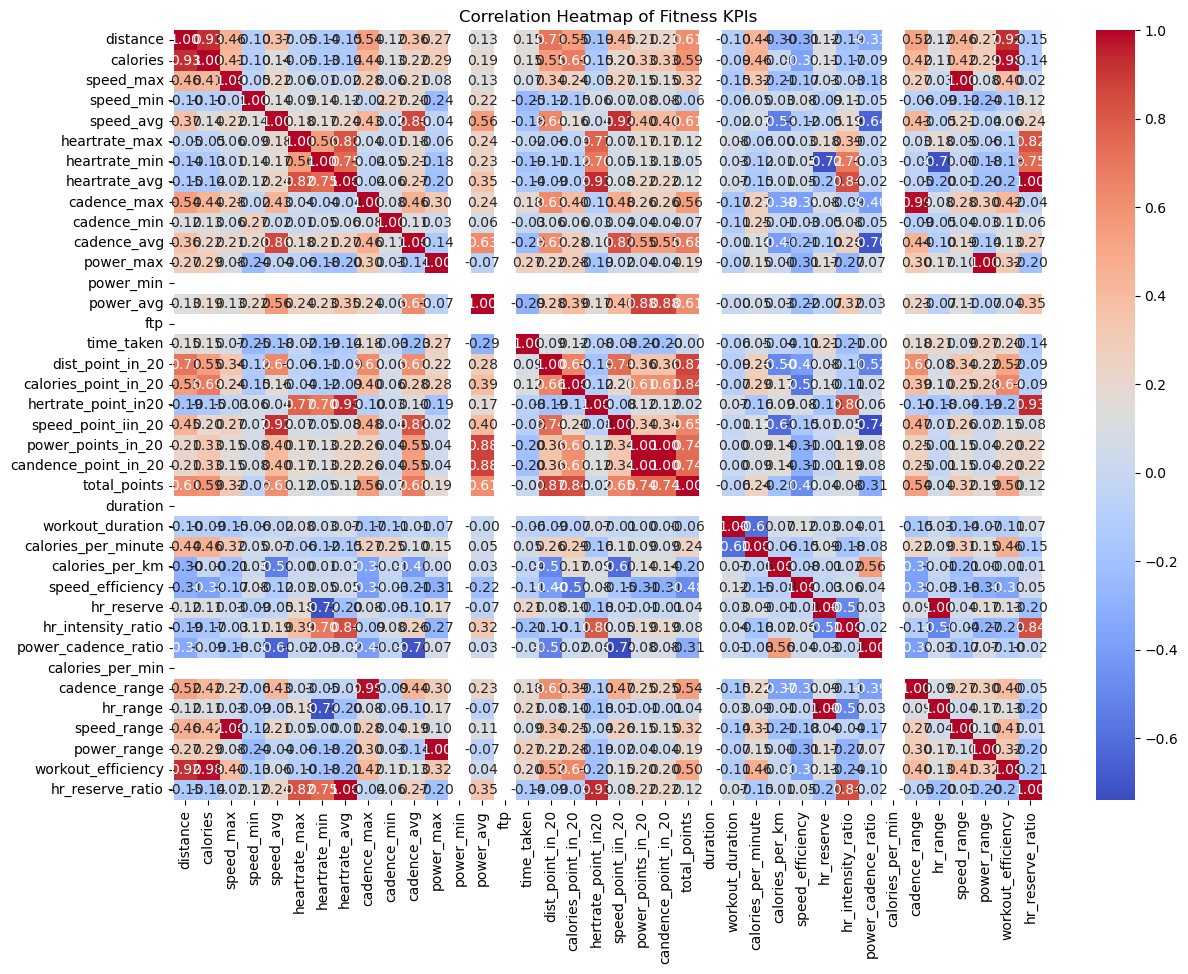

In [50]:
# Pick only numeric columns
numeric_df = df.select_dtypes(include='number')

# Plot heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Fitness KPIs")
plt.show()


In [56]:
# additional KPIs
df['effort_density'] = df['calories'] / df['duration']  # calories per minute
df['cadence_efficiency'] = df['cadence_avg'] / df['power_avg']  # higher = smoother pedal per watt
df['pace_index'] = df['speed_avg'] / df['hr_intensity_ratio']  # speed achieved per heart effort


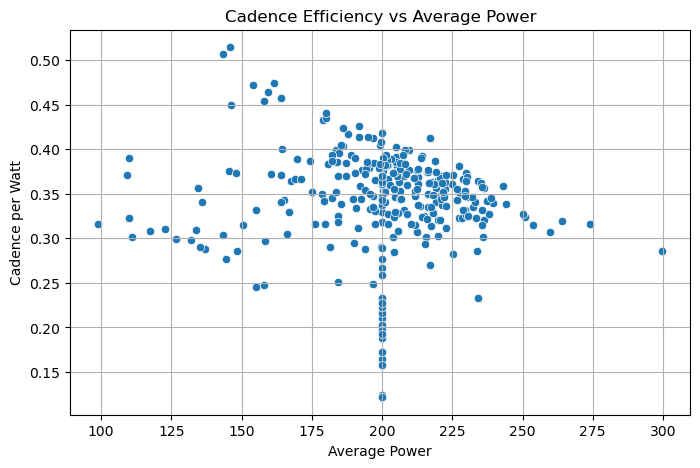

In [60]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='power_avg', y='cadence_efficiency', data=df)
plt.title('Cadence Efficiency vs Average Power')
plt.xlabel('Average Power')
plt.ylabel('Cadence per Watt')
plt.grid(True)
plt.show()


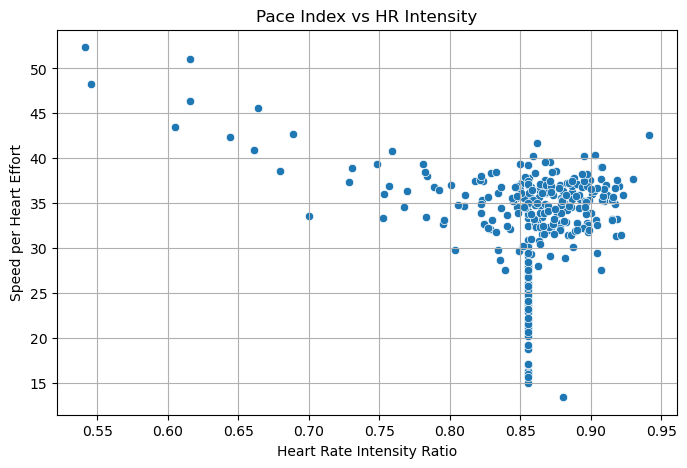

In [62]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='hr_intensity_ratio', y='pace_index', data=df)
plt.title('Pace Index vs HR Intensity')
plt.xlabel('Heart Rate Intensity Ratio')
plt.ylabel('Speed per Heart Effort')
plt.grid(True)
plt.show()


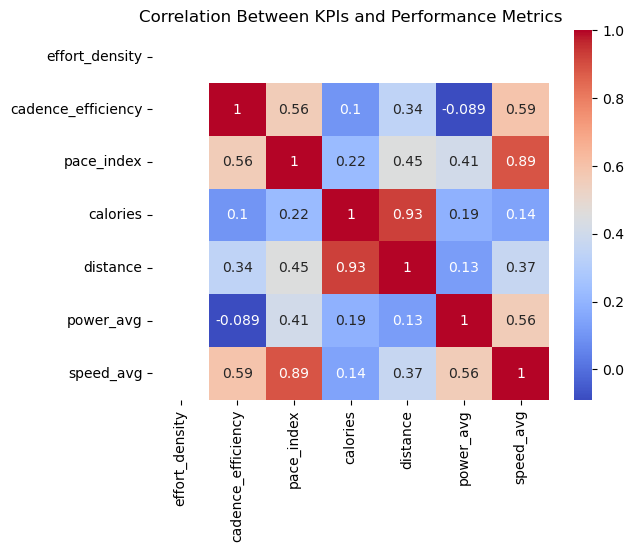

In [64]:
kpi_cols = ['effort_density', 'cadence_efficiency', 'pace_index', 'calories', 'distance', 'power_avg', 'speed_avg']
correlation_matrix = df[kpi_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Between KPIs and Performance Metrics")
plt.show()


In [66]:
# Define the new filename and path
output_path = r'C:\Semester 3\Capstone\Project\cycling_data_with_kpis.csv'

# Save the DataFrame to CSV
df.to_csv(output_path, index=False)

print(f"Updated dataset saved successfully to:\n{output_path}")


Updated dataset saved successfully to:
C:\Semester 3\Capstone\Project\cycling_data_with_kpis.csv
